In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10038515624902988718]

In [4]:
import pandas as pd
import numpy as np
import datetime
from pandas_summary import DataFrameSummary

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
df = pd.read_feather('train_normalized_data.fth')
df_test = pd.read_feather('test_normalized_data.fth')

In [7]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

In [8]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Precipitationmm',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'Promo', 'SchoolHoliday', 'StateHoliday_bool']
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Precipitationmm',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'Promo', 'SchoolHoliday', 'StateHoliday_bool']

In [9]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]

In [10]:
uniques.T

,uniques
Store,1115
DayOfWeek,7
Year,3
Month,12
Day,31
StateHoliday,4
CompetitionMonthsOpen,25
Promo2Weeks,26
StoreType,4
Assortment,3


# Asignación de dimensión de embeddings

In [11]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 2, 'Year': 2, 'Month': 2,
'Day': 10, 'StateHoliday': 2, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

In [12]:
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()
    print(v, cat_var_dict[v], len(uniques_), uniques_)
    print()

Store 50 1115 [   0    1    2 ... 1112 1113 1114]

DayOfWeek 2 7 [0 1 2 3 4 5 6]

Year 2 3 [0 1 2]

Month 2 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Day 10 31 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]

StateHoliday 2 4 [0 1 2 3]

CompetitionMonthsOpen 2 25 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

Promo2Weeks 1 26 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

StoreType 2 4 [0 1 2 3]

Assortment 3 3 [0 1 2]

PromoInterval 3 4 [0 1 2 3]

CompetitionOpenSinceYear 4 21 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Promo2SinceYear 4 8 [0 1 2 3 4 5 6 7]

State 6 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Week 25 52 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]

Events 4 22 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

# Definición de modelo

In [13]:
add_customers = True
log_output = True
output_activation = 'linear'

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2

In [15]:
def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [16]:
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

In [17]:
cat_vars, uniques, cat_var_dict

(['Store',
  'DayOfWeek',
  'Year',
  'Month',
  'Day',
  'StateHoliday',
  'CompetitionMonthsOpen',
  'Promo2Weeks',
  'StoreType',
  'Assortment',
  'PromoInterval',
  'CompetitionOpenSinceYear',
  'Promo2SinceYear',
  'State',
  'Week',
  'Events',
  'Promo_fw',
  'Promo_bw',
  'StateHoliday_bool_fw',
  'StateHoliday_bool_bw',
  'SchoolHoliday_fw',
  'SchoolHoliday_bw'],
         Store DayOfWeek Year Month Day StateHoliday CompetitionMonthsOpen  \
 uniques  1115         7    3    12  31            4                    25   
 
         Promo2Weeks StoreType Assortment  ... Promo2SinceYear State Week  \
 uniques          26         4          3  ...               8    12   52   
 
         Events Promo_fw Promo_bw StateHoliday_bool_fw StateHoliday_bool_bw  \
 uniques     22        6        6                    3                    3   
 
         SchoolHoliday_fw SchoolHoliday_bw  
 uniques                8                8  
 
 [1 rows x 22 columns],
 {'Store': 50,
  'DayOfWeek': 2,


In [18]:
# Descomentar para ver resultados
cat_vars_embed_outs
cat_var_inputs
cont_vars_inputs
cont_vars_outs

[<tf.Tensor 'CompetitionDistance_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Max_TemperatureC_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Mean_TemperatureC_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Min_TemperatureC_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Precipitationmm_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Max_Humidity_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Mean_Humidity_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Min_Humidity_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Max_Wind_SpeedKm_h_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Mean_Wind_SpeedKm_h_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'CloudCover_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'trend_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'trend_DE_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'AfterStateHoliday_bool_input:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'BeforeStateHoli

In [19]:
cat_vars_embed_outs + cont_vars_inputs

[<tf.Tensor 'Store_flat/Reshape:0' shape=(None, 50) dtype=float32>,
 <tf.Tensor 'DayOfWeek_flat/Reshape:0' shape=(None, 2) dtype=float32>,
 <tf.Tensor 'Year_flat/Reshape:0' shape=(None, 2) dtype=float32>,
 <tf.Tensor 'Month_flat/Reshape:0' shape=(None, 2) dtype=float32>,
 <tf.Tensor 'Day_flat/Reshape:0' shape=(None, 10) dtype=float32>,
 <tf.Tensor 'StateHoliday_flat/Reshape:0' shape=(None, 2) dtype=float32>,
 <tf.Tensor 'CompetitionMonthsOpen_flat/Reshape:0' shape=(None, 2) dtype=float32>,
 <tf.Tensor 'Promo2Weeks_flat/Reshape:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'StoreType_flat/Reshape:0' shape=(None, 2) dtype=float32>,
 <tf.Tensor 'Assortment_flat/Reshape:0' shape=(None, 3) dtype=float32>,
 <tf.Tensor 'PromoInterval_flat/Reshape:0' shape=(None, 3) dtype=float32>,
 <tf.Tensor 'CompetitionOpenSinceYear_flat/Reshape:0' shape=(None, 4) dtype=float32>,
 <tf.Tensor 'Promo2SinceYear_flat/Reshape:0' shape=(None, 4) dtype=float32>,
 <tf.Tensor 'State_flat/Reshape:0' shape=(None, 6) 

In [20]:
first_hidden_units = 1000
second_hidden_units = 500
l2_lambda = 1e-3
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)
x = Dense(first_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(merged)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = LeakyReLU()(x)
x = Dense(second_hidden_units, kernel_initializer="uniform", kernel_regularizer=l2(l2_lambda))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = LeakyReLU()(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

In [21]:
if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

In [22]:
# Descomentar para ver
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Year_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
_______________________________________________________________________________________

In [23]:
from tensorflow import keras

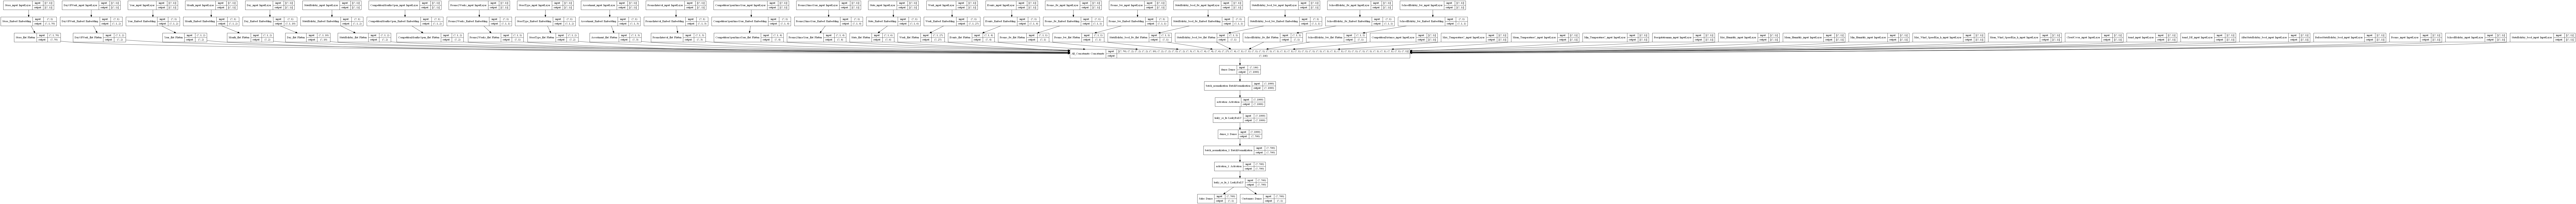

In [24]:
keras.utils.plot_model(model, show_shapes=True) 

In [25]:
model.save_weights('initial_weights.hdf5')

In [26]:
df

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,0,0,4,2015-07-31,5263,555,1,1.286984,0,2.153114,...,0.648055,1.078159,0,0,5,0,5,1,0,1
1,1,1,4,2015-07-31,6064,625,1,1.286984,0,2.153114,...,0.968608,1.078159,0,0,5,0,5,1,0,1
2,2,2,4,2015-07-31,8314,821,1,1.286984,0,2.153114,...,0.648055,1.078159,0,0,5,0,5,1,0,1
3,3,3,4,2015-07-31,13995,1498,1,1.286984,0,2.153114,...,0.968608,1.078159,0,0,5,0,5,1,0,1
4,4,4,4,2015-07-31,4822,559,1,1.286984,0,2.153114,...,0.648055,1.078159,0,0,5,0,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831352,1003750,675,1,2013-01-01,3821,777,1,-0.777010,1,2.153114,...,-1.179097,1.078159,0,-6,1,1,0,7,1,1
831353,1003756,681,1,2013-01-01,3375,566,1,-0.777010,1,2.153114,...,-1.179097,1.078159,0,-6,1,1,0,4,1,1
831354,1003807,732,1,2013-01-01,10765,2377,1,-0.777010,1,2.153114,...,-1.179097,1.078159,0,-6,1,1,0,4,1,1
831355,1004021,947,1,2013-01-01,4491,1039,1,-0.777010,1,2.153114,...,-1.179097,1.078159,0,-6,1,1,0,4,2,1


In [27]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_val)/(len(df_train) + len(df_val))}')

Cantidad en val: 30029, porcentaje: 0.03612046329074032


In [28]:
df_train

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
30029,34406,0,1,2015-06-30,5735,568,1,1.286984,0,-0.464444,...,-0.345659,1.078159,0,0,0,0,2,0,0,4
30030,34407,2,1,2015-06-30,13261,1072,1,1.286984,0,2.153114,...,-0.345659,1.078159,0,0,2,0,2,5,0,4
30031,34408,3,1,2015-06-30,13106,1488,1,1.286984,0,-0.464444,...,-0.025106,1.078159,0,0,0,0,2,0,0,4
30032,34409,4,1,2015-06-30,6635,645,1,1.286984,0,-0.464444,...,-0.345659,1.078159,0,0,0,0,2,0,0,4
30033,34410,5,1,2015-06-30,7427,709,1,1.286984,0,-0.464444,...,-0.345659,1.078159,0,0,0,0,2,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831352,1003750,675,1,2013-01-01,3821,777,1,-0.777010,1,2.153114,...,-1.179097,1.078159,0,-6,1,1,0,7,1,1
831353,1003756,681,1,2013-01-01,3375,566,1,-0.777010,1,2.153114,...,-1.179097,1.078159,0,-6,1,1,0,4,1,1
831354,1003807,732,1,2013-01-01,10765,2377,1,-0.777010,1,2.153114,...,-1.179097,1.078159,0,-6,1,1,0,4,1,1
831355,1004021,947,1,2013-01-01,4491,1039,1,-0.777010,1,2.153114,...,-1.179097,1.078159,0,-6,1,1,0,4,2,1


In [29]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(20,5))
# plt.plot((df_train[df_train['Store']==1]['Sales'].values - df_train[df_train['Store']==1]['Sales'].mean())/df_train[df_train['Store']==1]['Sales'].std())
# plt.show()
# plt.figure(figsize=(20,5))
# plt.plot(np.log(df_train[df_train['Store']==1]['Sales'].values)/np.max(np.log(df_train[df_train['Store']==1]['Sales'].values)))
# plt.show()

In [30]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [31]:
#df_train.groupby('Store')

In [32]:
df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

C:\Users\fvillarino\Anaconda3\envs\dip-ml-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\fvillarino\Anaconda3\envs\dip-ml-env\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [33]:
df_train[df_train["Store"]==0]

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw,mean_by_store,Sales_store
30029,34406,0,1,2015-06-30,5735,568,1,1.286984,0,-0.464444,...,0,0,0,0,2,0,0,4,4708.079622,1026.920378
30978,35355,0,0,2015-06-29,5197,541,1,1.286984,0,-0.464444,...,0,0,0,0,1,0,0,5,4708.079622,488.920378
31916,37376,0,5,2015-06-27,4019,463,1,-0.777010,0,-0.464444,...,8,-2,0,0,0,0,0,5,4708.079622,-689.079622
33031,38491,0,4,2015-06-26,3317,420,1,-0.777010,0,-0.464444,...,7,-3,0,0,0,0,0,4,4708.079622,-1391.079622
34144,39604,0,3,2015-06-25,3533,433,1,-0.777010,0,-0.464444,...,6,-4,0,0,1,0,0,3,4708.079622,-1175.079622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825843,996447,0,0,2013-01-07,7176,785,1,1.286984,0,2.153114,...,0,0,7,1,1,5,0,5,4708.079622,2467.920378
826910,998619,0,5,2013-01-05,4997,635,1,-0.777010,0,2.153114,...,0,-2,5,1,0,7,0,5,4708.079622,288.920378
828016,999733,0,4,2013-01-04,4486,619,1,-0.777010,0,2.153114,...,0,-3,4,1,0,7,0,4,4708.079622,-222.079622
829124,1000848,0,3,2013-01-03,4327,578,1,-0.777010,0,2.153114,...,0,-4,3,1,0,7,0,3,4708.079622,-381.079622


In [34]:
from tensorflow.keras import backend as K

In [35]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [36]:
def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())

In [37]:
get_metric(df_val, df_val['mean_by_store'])

0.2980207580970669

In [38]:
get_metric(df_val, df_val['Sales'])

0.0

In [39]:
all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

In [40]:
type(X_train)

list

In [41]:
X_train

[array([[   0.],
        [   2.],
        [   3.],
        ...,
        [ 732.],
        [ 947.],
        [1096.]]),
 array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]),
 array([[2.],
        [2.],
        [2.],
        ...,
        [0.],
        [0.],
        [0.]]),
 array([[5.],
        [5.],
        [5.],
        ...,
        [0.],
        [0.],
        [0.]]),
 array([[29.],
        [29.],
        [29.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]]),
 array([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]]),
 array([[24.],
        [24.],
        [24.],
        ...,
        [24.],
        [24.],
        [24.]]),
 array([[25.],
        [25.],
        [25.],
        ...,
        [25.],
        [25.],
        [25.]]),
 array([[2.],
        [0.],
        [2.],
        ...,
        [1.],
        [1.],
        [1.]]),
 array([[0.],
        [0.],
        [2.],
        ...,
        [1.],
    

In [42]:
if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns])).values
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
#     y_mean = df_train[y_out_columns].mean().values
#     y_std = df_train[y_out_columns].std().values
#     y_train = (df_train[y_out_columns].values - y_mean)/y_std
#     y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

In [43]:
type(X_train)

list

In [44]:
lr = 0.001
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

In [45]:
if add_customers:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [46]:
X_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [47]:
epochs = 20
batch_size = 256
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint], verbose=2)

Epoch 1/20

Epoch 00001: val_Sales_mse improved from inf to 0.00478, saving model to bestmodel.hdf5
3131/3131 - 75s - loss: 0.1297 - Sales_loss: 0.0105 - Customers_loss: 0.0084 - Sales_mse: 0.0105 - Sales_rmspe: 0.0818 - Customers_mse: 0.0084 - Customers_rmspe: 0.0941 - val_loss: 0.0119 - val_Sales_loss: 0.0048 - val_Customers_loss: 0.0010 - val_Sales_mse: 0.0048 - val_Sales_rmspe: 0.0791 - val_Customers_mse: 0.0010 - val_Customers_rmspe: 0.0412
Epoch 2/20

Epoch 00002: val_Sales_mse improved from 0.00478 to 0.00285, saving model to bestmodel.hdf5
3131/3131 - 76s - loss: 0.0047 - Sales_loss: 0.0013 - Customers_loss: 0.0013 - Sales_mse: 0.0013 - Sales_rmspe: 0.0402 - Customers_mse: 0.0013 - Customers_rmspe: 0.0467 - val_loss: 0.0142 - val_Sales_loss: 0.0028 - val_Customers_loss: 0.0092 - val_Sales_mse: 0.0028 - val_Sales_rmspe: 0.0630 - val_Customers_mse: 0.0092 - val_Customers_rmspe: 0.1203
Epoch 3/20

Epoch 00003: val_Sales_mse improved from 0.00285 to 0.00138, saving model to bestmod

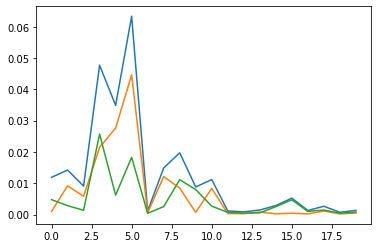

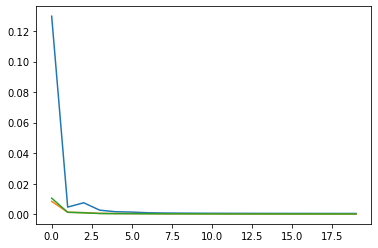

In [48]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_Customers_mse'])
plt.plot(history.history['val_Sales_mse'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['Customers_mse'])
plt.plot(history.history['Sales_mse'])

# Métrica

$$
\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}
$$

In [49]:
model.evaluate(X_val, y_val)

939/939 [==============================] - 31s 33ms/step - loss: 0.0014 - Sales_loss: 8.0314e-04 - Customers_loss: 4.9058e-04 - Sales_mse: 8.0314e-04 - Sales_rmspe: 0.0331 - Customers_mse: 4.9058e-04 - Customers_rmspe: 0.0295 17s - loss: 0.0011 - Sales_loss: 6.3427e-04 - Cust - ETA: 19s - loss: 9.9259e-04 - - ETA: 18s - loss: 0.0011 - Sales_loss: 6.5709e-04 - Customers_loss: 3.9631e-04 - Sales_mse: 6.5709e-04 - Sales_rmspe: 0. - ETA: 17s - loss: 0.0012 - Sales_loss: 6.9925e-04 - Customers_loss: 4.0120e-04 - Sales_mse: 6.9925e-04 - Sales_rmspe: 0.0312 - Customers_mse: 4. - ETA: 16s - loss: 0.0011 - Sales_loss: 6.8662e-04 - Customers_loss: 3.9689e-04 - Sales_mse: 6.8662e-04 - Sales - ETA: 15s - loss: 0.0013 - Sales_loss: 7.4730e-04 - Customers_loss: 4.4296e-04 - Sales_mse: 7.4730e-04 - - ETA: 12s - loss: 0.0012 - Sales_loss: 7.2679e-04 - Customers_loss: 4.2575e-04 - Sales_mse: 7.2679e-04 - Sales_rmspe: 0.0318 - Customers_mse: 4.2575e-04 - Customers_rms - ETA: 12s - loss: 0.0012 - Sales_l

[0.0013597997603937984,
 0.0008031393517740071,
 0.0004905845271423459,
 0.0008031393517740071,
 0.03309450298547745,
 0.0004905845271423459,
 0.029451850801706314]

In [50]:
model.load_weights('bestmodel.hdf5')
model.evaluate(X_val, y_val)

939/939 [==============================] - 30s 32ms/step - loss: 0.0012 - Sales_loss: 4.1980e-04 - Customers_loss: 5.4648e-04 - Sales_mse: 4.1980e-04 - Sales_rmspe: 0.0232 - Customers_mse: 5.4648e-04 - Customers_rmspe: 0.0300 16s - loss: 0.0012 - Sales_loss: 4.1702e-04 - Customers_loss: 5.4806e-04 - Sales_mse: 4.1702e-04 - Sales_rmspe: 0.0227 - Customers_mse: 5.48 - ETA: 19s - loss: 0.0012 - Sales_loss: 3.6790e-04 - Customers_loss: 6.1188e-04 - Sales_mse: 3.6790e-04 - Sales_rmspe: 0.0214 - ETA: 19s - loss: 0.0012 - Sales_loss: 4.3127e-04 - Customers_loss: 5.4296e-04 - Sales_mse: 4.3127e-04 - Sales - ETA: 17s - loss: 0.0012 - Sales_loss: 4.2003e-04 - Customers_loss: 5.6864e-04 - Sales_mse: 4.2003e-04 - Sales_rmspe: 0.0230 - Customers_mse: 5.6864e-04 - - ETA: 17s - loss: 0.0012 - Sales_loss: 4.1040e-04 - Customers_loss: 5.5758e-04 - Sales_mse: 4.1040e-04 - Sales_rmspe: 0.0228 - Customers_mse: 5.5758e-04 - Cus - ETA: 16s - loss: 0.0011 - Sales_loss: 4.0698e-04 - Customers_loss: 5.4812e-04

[0.0011542883003130555,
 0.0004198005481157452,
 0.0005464801215566695,
 0.0004198005481157452,
 0.02319074049592018,
 0.0005464801215566695,
 0.030035333707928658]

In [56]:
# model.load_weights('bestmodel.hdf5')
# model.evaluate(X_val, y_val)
# 30188/30188 [==============================] - 5s 172us/step
# [0.12197033089921382,
#  0.07211007360268763,
#  0.037183713050426136,
#  0.07211007360268763,
#  0.037183713050426136]

# [0.12932546436786652,
#  0.07751645147800446,
#  0.039259567856788635,
#  0.07751645147800446,
#  0.039259567856788635]

In [51]:
if log_output:
    if add_customers:
        y_pred = np.exp(model.predict(X_val, verbose=1)[0][:, 0]*max_log_y[0])
        y_pred_test = np.exp(model.predict(X_test, verbose=1)[0][:, 0]*max_log_y[0])
    else:
        y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)[:,0]
        y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)[:,0]
else:
    if add_customers:
        y_pred = (model.predict(X_val, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
        y_pred_test = (model.predict(X_test, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
    else:
#         y_pred = model.predict(X_val, verbose=1)[:,0]*y_std + y_mean
#         y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_std + y_mean
        y_pred = model.predict(X_val, verbose=1)[:,0]*y_max
        y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_max
y_pred_test[df_test['Open'] == 0] = 0

1284/1284 [==============================] - 65s 50ms/step


In [52]:
np.sqrt((((df_val['Sales'].values - y_pred)/df_val['Sales'].values)**2).sum()/len(y_pred))

0.2131993189468043

In [53]:
y_pred_test[:10]

array([ 4164.4443,  6618.485 , 10194.414 ,  6491.9697,  5976.868 ,
        5635.826 ,  8685.782 ,  8325.121 ,  4538.431 ,  4923.0767],
      dtype=float32)

# Baseline

In [54]:
import pandas as pd
sample_csv = pd.read_csv('dataset/rossmann/sample_submission.csv')

In [55]:
stores_mean = {}
for store, g_df in df.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [56]:
df_test['Sales'] = df_test['Store'].apply(stores_mean.get)
df_test.loc[df_test['Open'] == 0, 'Sales'] = 0

In [57]:
df_test[['Store', 'Sales']].head(10)

,Store,Sales
0,0,4700.459635
1,2,6901.818065
2,6,8755.808974
3,7,5539.358418
4,8,6414.451058
5,9,5526.768734
6,10,7754.504624
7,11,7497.010349
8,12,5000.189627
9,13,5458.603113


In [58]:
df_test[df_test['Open'] == 0][['Store', 'Sales']].head()

,Store,Sales
543,702,0.0
676,878,0.0
840,1096,0.0
1399,702,0.0
1532,878,0.0


In [59]:
sample_csv['Sales'] = df_test['Sales']

In [60]:
sample_csv.to_csv(f'submision_fullmodel_nn.csv', index=False)

In [61]:
sample_csv.head()

,Id,Sales
0,1,4700.459635
1,2,6901.818065
2,3,8755.808974
3,4,5539.358418
4,5,6414.451058


### Armo Test

In [62]:
df_test['Sales'] = y_pred_test

In [63]:
df_test.loc[df_test['Open'] == 0, 'Sales'] = 0

In [64]:
#df_test[df_test["Store"]==0]

In [65]:
sample_csv['Sales'] = df_test['Sales']

In [66]:
sample_csv.to_csv(f'submision_fullmodel_nn.csv', index=False)

In [67]:
!kaggle competitions submit -c rossmann-store-sales -f "submision_fullmodel_nn.csv" -m "submision_fullmodel_nn"

401 - Unauthorized


# Sumbit a la competición

In [68]:
import os
print(os.listdir("./"))

['.git', '.gitignore', '.ipynb_checkpoints', '01-data-visualization.ipynb', '02-data-preprocess.ipynb', '03-durations-preprocess.ipynb', '03.1_Remove-Outliers-With_Dev.ipynb', '04-Normalize-and_encode.ipynb', '04.1_Baselines.ipynb', '05-Embeddings.ipynb', '06-full-model.ipynb', '07-lightGBM.ipynb', '08-XGBoost-hyp-search.ipynb', '08-XGBoost.ipynb', '09-lightGBM-hyp-search.ipynb', '101-preprocess.ipynb', '102-keras-NN.ipynb', 'all_preprocessed_test.fth', 'all_preprocessed_train.fth', 'all_preprocessed_with_Outlier_train.fth', 'analisis.ipynb', 'bestmodel.hdf5', 'best_val_rmspe.hdf5', 'create_features-fastai.ipynb', 'dataset', 'embeddings_model.hdf5', 'initial_weights.hdf5', 'joined_test_before_durations.fth', 'joined_train_before_durations.fth', 'model.png', 'models.py', 'Original_3rd_place.ipynb', 'README.md', 'rossman.ipynb', 'Rossmann-TP.ipynb', 'rossmann.zip', 'submision.csv', 'submision_baseline.csv', 'submision_baseline_Store-DayOfWeek.csv', 'submision_False-5-4000-0.05.csv', 'sub

In [70]:

sample_csv = pd.read_csv('dataset/rossmann/sample_submission.csv')
sample_csv['Sales'] = y_pred_test
sample_csv.head()

sample_csv.to_csv(f'submision_{add_customers}-{log_output}-{output_activation}-{l2_lambda}-{first_hidden_units}-{epochs}-{batch_size}-{lr}.csv', index=False)


In [71]:
!kaggle competitions submit -c rossmann-store-sales -f 'submision_True-True-linear-0.001-1000-20-256-0.001.csv' -m "baseline rossman"

Traceback (most recent call last):
  File "c:\users\fvillarino\anaconda3\envs\dip-ml-env\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\fvillarino\anaconda3\envs\dip-ml-env\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\fvillarino\Anaconda3\envs\dip-ml-env\Scripts\kaggle.exe\__main__.py", line 7, in <module>
  File "c:\users\fvillarino\anaconda3\envs\dip-ml-env\lib\site-packages\kaggle\cli.py", line 67, in main
    out = args.func(**command_args)
  File "c:\users\fvillarino\anaconda3\envs\dip-ml-env\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 561, in competition_submit_cli
    submit_result = self.competition_submit(file_name, message,
  File "c:\users\fvillarino\anaconda3\envs\dip-ml-env\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 513, in competition_submit
    content_length=os.path.getsize(file_name),
  File "c:\users\fvillarino\anaconda3\envs\dip-ml-env\

# Analisis de embedings

In [72]:
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

In [73]:
model.get_layer('DayOfWeek_Embed').get_weights()[0]

array([[-0.13747473, -0.53432256],
       [ 0.08177346, -0.24810232],
       [ 0.08554773, -0.17575826],
       [ 0.12108809, -0.25544944],
       [ 0.1343419 , -0.3153171 ],
       [ 0.08780565,  1.165908  ],
       [-1.3230331 ,  0.8590232 ]], dtype=float32)

(7, 2)


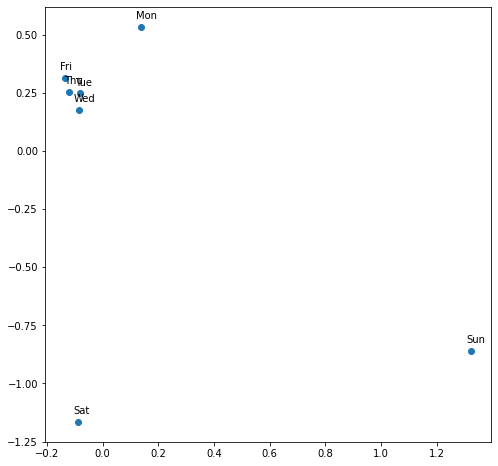

In [74]:
model.load_weights('bestmodel.hdf5')
plot_embed('DayOfWeek_Embed', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

(12, 2)


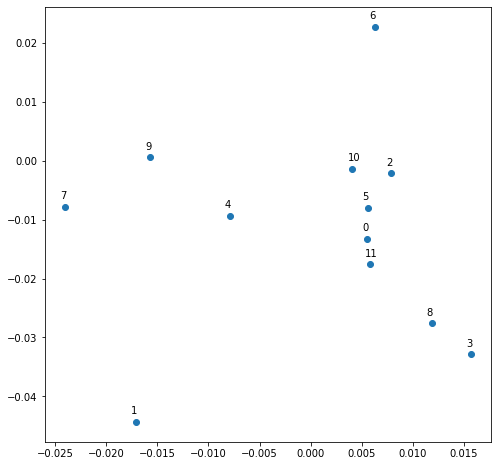

In [75]:
plot_embed('Month_Embed', list(range(12)))

In [76]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [77]:
day_of_week_embedding = model.get_layer('DayOfWeek_Embed').get_weights()[0]

In [78]:
day_of_week_embedding.shape

(7, 2)

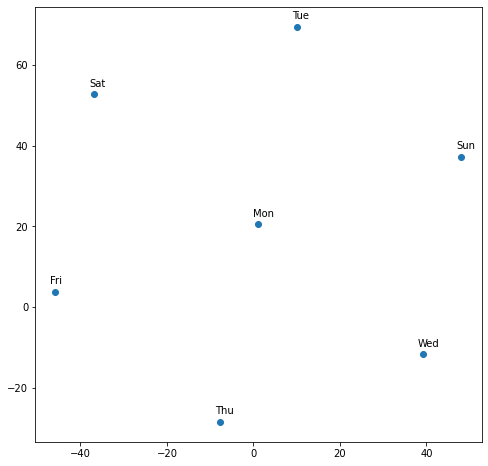

In [79]:
tsne = TSNE(n_components=2, random_state=1, learning_rate=10, n_iter=10000)
Y = tsne.fit_transform(day_of_week_embedding)
names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
plt.figure(figsize=(8,8))
plt.scatter(-Y[:, 0], -Y[:, 1])
for i, txt in enumerate(names):
    plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

In [80]:
cat_vars

['Store',
 'DayOfWeek',
 'Year',
 'Month',
 'Day',
 'StateHoliday',
 'CompetitionMonthsOpen',
 'Promo2Weeks',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'State',
 'Week',
 'Events',
 'Promo_fw',
 'Promo_bw',
 'StateHoliday_bool_fw',
 'StateHoliday_bool_bw',
 'SchoolHoliday_fw',
 'SchoolHoliday_bw']

## Store embeddings

In [81]:
submodel = Model(cat_var_inputs + cont_vars_inputs, merged)

In [82]:
submodel.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Year_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
_______________________________________________________________________________________

In [83]:
submodel.save('embeddings_model.hdf5')